# 6.5 Ejemplo con Datos demográficos

```{warning}
Este cuaderno está realizando con código `R`
```


* Datos: censo irlandés, area de Dublín, año 2011
* Algoritmo SOM en R
* Visualización de los resultados

[Referencia online](https://www.shanelynn.ie/self-organising-maps-for-customer-segmentation-using-r/)

Los códigos `R` y los datos originales están en el repositorio [GIT](https://github.com/shanealynn/Kohonen-Self-organising-maps-in-R/)

Los datos _cocinados_ en: `dataIrelandPopulationSOM.csv`

## Carga y descripción de los datos

In [1]:
require(kohonen)



Loading required package: kohonen



In [2]:
data<-read.csv("./data/dataIrelandPopulationSOM.csv")

In [3]:
typeof(data)

[1] "list"

In [4]:
head(data,10)

X     id        avr_age  avr_household_size avr_education_level avr_num_cars
1  15687 267123023 40.02811 2.524752           3.038462            1.0396040   
2  13895 267016001 35.67366 3.320611           3.597701            1.9837398   
3  13896 267016002 35.88235 3.324324           4.295302            1.9054054   
4  13729 267002034 38.51667 3.088608           3.871795            1.7307692   
5  13724 267002029 24.67800 3.512000           3.933735            1.1120000   
6  13739 267002044 25.13953 3.136364           4.496855            1.1090909   
7  13725 267002030 25.05882 3.441176           4.726872            1.5588235   
8  13710 267002015 24.43733 2.861538           3.973510            0.9692308   
9  13712 267002017 23.50530 2.958763           4.674242            1.3917526   
10 13713 267002018 24.67355 2.928571           4.530769            1.4047619   
   avr_health rented_percent unemployment_percent internet_percent
1  4.385542    6.930693      15.343915            71.00000        
2  4.509434    4.878049      12.461059            72.95082        
3  4.596639    1.351351      10.404624            83.78378        
4  4.530172    3.896104       8.108108            78.94737        
5  4.510345   20.800000      21.810700            81.30081        
6  4.419162   29.357798      24.154589            81.90476        
7  4.689888   23.529412       8.680556            94.11765        
8  4.580556    4.687500      19.457014            81.25000        
9  4.685921   20.618557      14.044944            91.75258        
10 4.579832   14.814815      10.897436            82.92683        
   single_percent married_percent separated_percent divorced_percent
1  53.41365       33.33333        4.8192771         2.8112450       
2  49.41725       44.98834        1.3986014         0.2331002       
3  47.47899       43.69748        3.3613445         0.0000000       
4  47.08333       48.33333        0.8333333         1.2500000       
5  67.12018       26.98413        2.2675737         1.5873016       
6  64.24419       30.23256        1.4534884         3.4883721       
7  55.55556       36.81917        3.7037037         2.8322440       
8  70.40000       21.33333        2.9333333         3.4666667       
9  62.54417       32.86219        2.4734982         1.7667845       
10 66.52893       29.75207        1.6528926         1.6528926       
   widow_percent
1  5.6224900    
2  3.9627040    
3  5.4621849    
4  2.5000000    
5  2.0408163    
6  0.5813953    
7  1.0893246    
8  1.8666667    
9  0.3533569    
10 0.4132231

In [5]:
names(data)

[1] "X"                    "id"                   "avr_age"             
 [4] "avr_household_size"   "avr_education_level"  "avr_num_cars"        
 [7] "avr_health"           "rented_percent"       "unemployment_percent"
[10] "internet_percent"     "single_percent"       "married_percent"     
[13] "separated_percent"    "divorced_percent"     "widow_percent"

In [6]:
dim(data)

[1] 4806   15

## Selección de datos y tratamiento

Hacemos una subselección de las variables al conjunto 2,4,5,8.

Centramos y escalamos las variables para que tengan igual importancia durante el proceso SOM

Convertimos los datos a una matriz

In [7]:
c(2,4,5,8)+1

[1] 3 5 6 9

In [9]:
names(data)[c(2,4,5,8)+1]

[1] "avr_age"              "avr_education_level"  "avr_num_cars"        
[4] "unemployment_percent"

In [21]:
data_train <- data[,c(2,4,5,8)+1]
head(data_train,10)

avr_age  avr_education_level avr_num_cars unemployment_percent
1  40.02811 3.038462            1.0396040    15.343915           
2  35.67366 3.597701            1.9837398    12.461059           
3  35.88235 4.295302            1.9054054    10.404624           
4  38.51667 3.871795            1.7307692     8.108108           
5  24.67800 3.933735            1.1120000    21.810700           
6  25.13953 4.496855            1.1090909    24.154589           
7  25.05882 4.726872            1.5588235     8.680556           
8  24.43733 3.973510            0.9692308    19.457014           
9  23.50530 4.674242            1.3917526    14.044944           
10 24.67355 4.530769            1.4047619    10.897436

In [22]:
data_train_matrix <- as.matrix(scale(data_train))

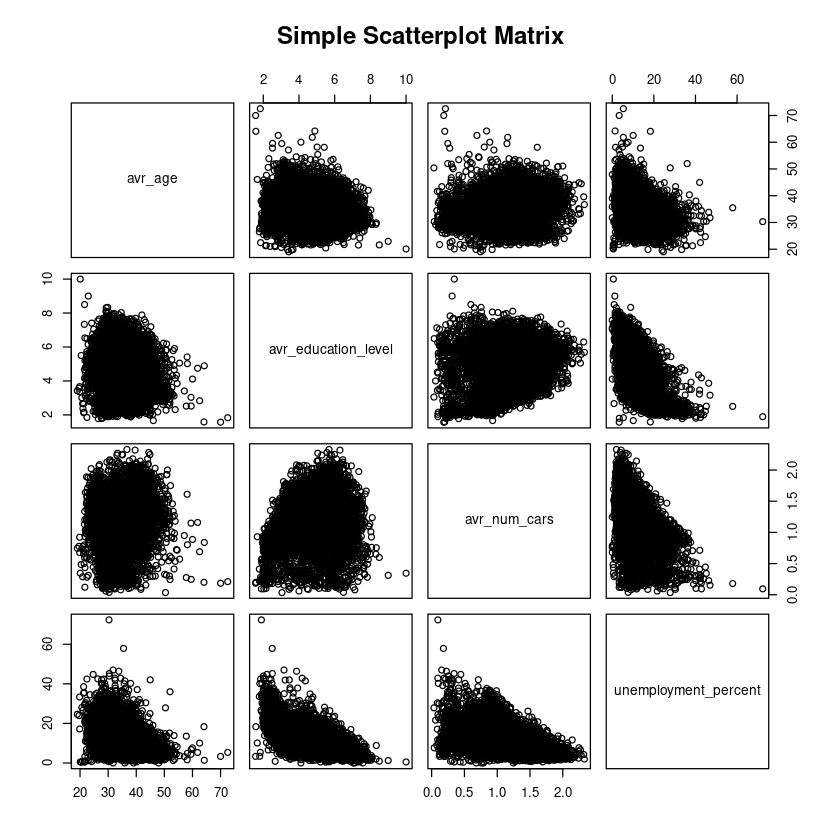

In [16]:
#''''''

pairs(~avr_age+avr_education_level+avr_num_cars+unemployment_percent,data=data,
   main="Simple Scatterplot Matrix")

## Definir y entrenar el SOM

Creamos el SOM _grid_ con topología hexagonal, y tamaño $20\times20$.

Entrenamos el SOM usando el grid anterior. Usamos las opciones por defecto del paquete.

In [23]:
som_grid <- somgrid(xdim = 20, ydim=20, topo="hexagonal")

In [24]:
som_model <- som(data_train_matrix, 
    grid=som_grid, 
    rlen=500, 
    alpha=c(0.05,0.01), 
    keep.data = TRUE )

## Visualizar los datos

In [43]:
coolBlueHotRed <- function(n, alpha = 1) {
  rainbow(n, end=4/6, alpha=alpha)[n:1]
}

pretty_palette <- c("#1f77b4", '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2')


### Progreso del entrenamiento

A medida que avanza el entrenamiento, la distancia de los pesos de cada nodo a los _inputs_ asociados a dicho nodo se reduce. Idealmente esta distancia debería alcanzar un _plateau_ mínimo.

Si la curva sigue decreciendo quizás son necesarias más iteraciones o cambiar los parámetros de las funciones de aprendizaje y núcleo de vecindad.

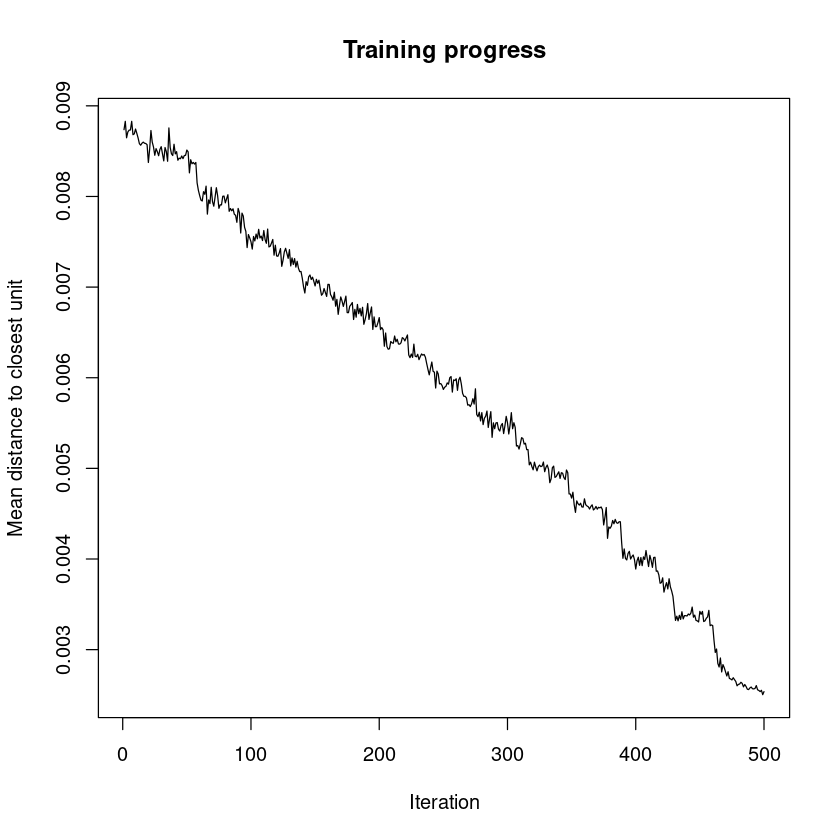

In [25]:
plot(som_model, type = "changes")

### Conteo por nodo

Visualizar el número de datos de entrada que están asociados a cada nodo en el mapa.

Esto puede ser usado como una medida de la calidad del mapa:
   * valores altos en ciertas áreas del mapa sugieren que un mapa más grande puede ser adecuado
   * muchos nodos vacíos indican que el mapa es demasiado grande

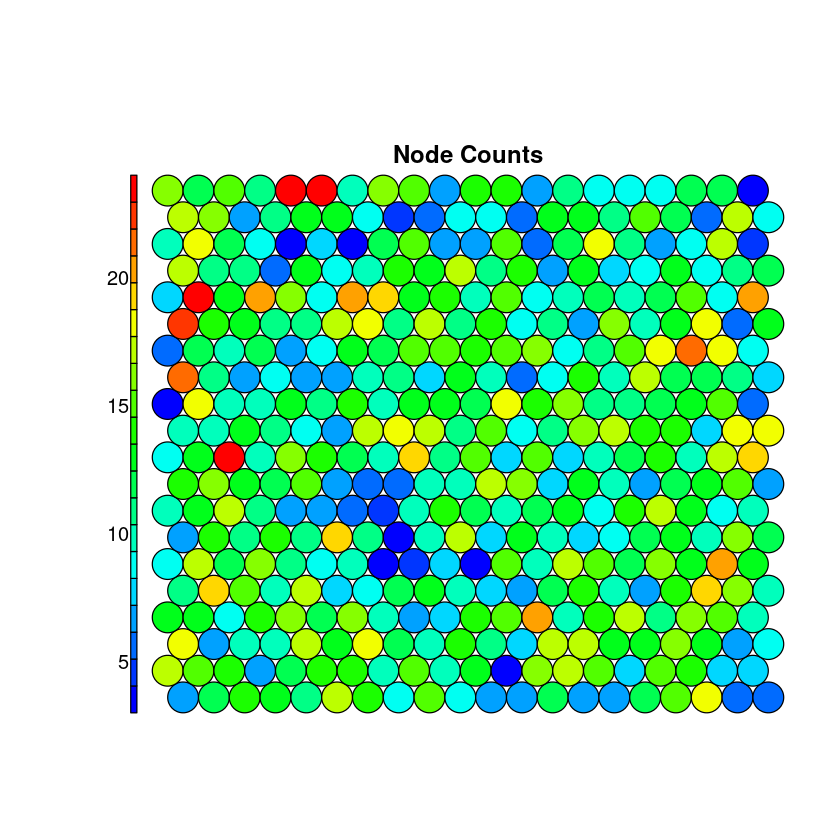

In [29]:
plot(som_model, type = "counts", main="Node Counts", palette.name=coolBlueHotRed)

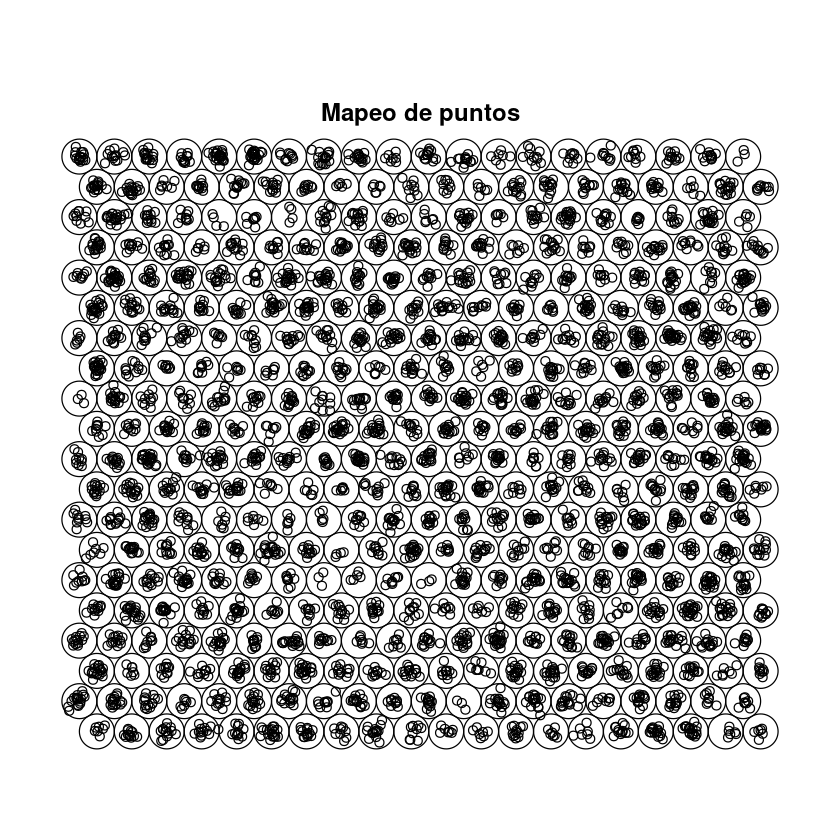

In [52]:
plot(som_model, type="mapping", main = "Mapeo de puntos", palette.name=coolBlueHotRed)

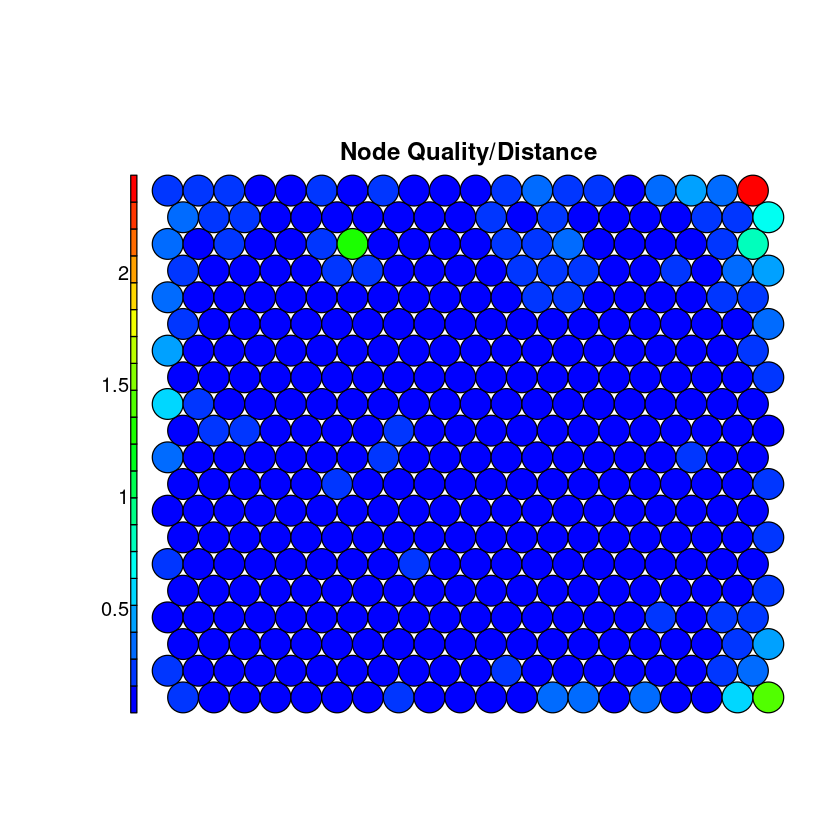

In [30]:
plot(som_model, type = "quality", main="Node Quality/Distance", palette.name=coolBlueHotRed)

### U-matrix

La [$U$-matrix](https://en.wikipedia.org/wiki/U-matrix) es una representación de las distancias entre los nodos.

Áreas donde la distancia entre vecinos sea baja indican grupos de nodos que son similares.

Áreas con grandes distancias entre nodos marcan diferencias e indican fronteras naturales entre los _clusters_ de nodos.

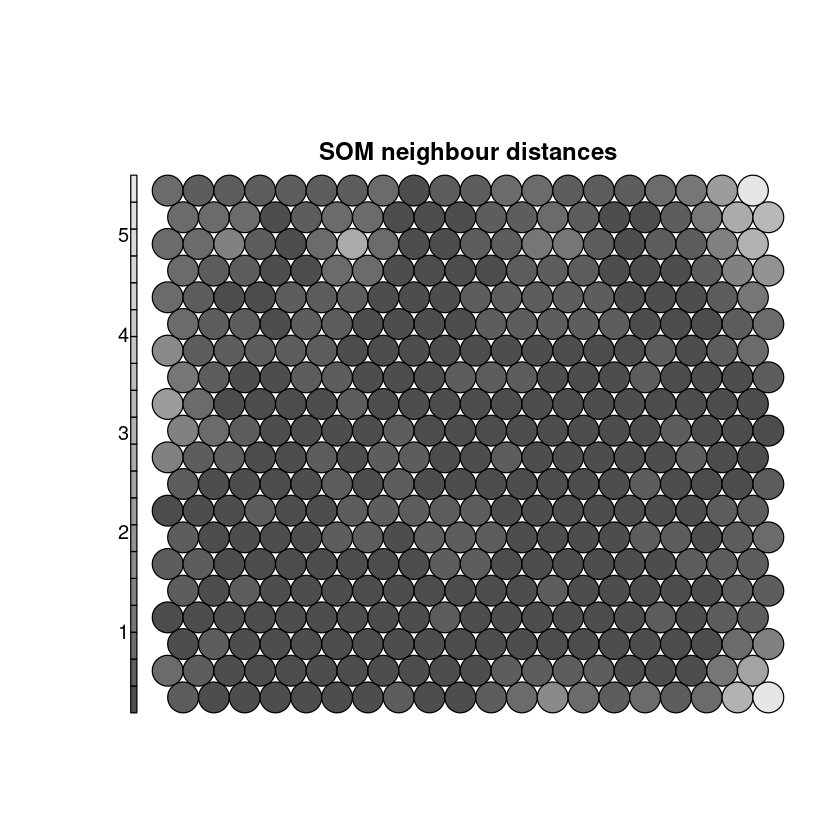

In [53]:
plot(som_model, type="dist.neighbours", main = "SOM neighbour distances", palette.name=grey.colors)

### Mápa de _códigos_

En el siguiente mapa, para cada nodo, se representa un diagrama con información de su vector prototipo. En este caso son valors normalizados de los valores originales y, por tanto, se pueden comparar.

Cada vector de pesos de cada nodo es _representativo_ (similar) a los de los datos que están asociados a dicho nodo.

Esta visualización permite enconrtar patrones en la distribución de _muestras_ y _variables_.

Existe varias opciones para realizar esta presentación.

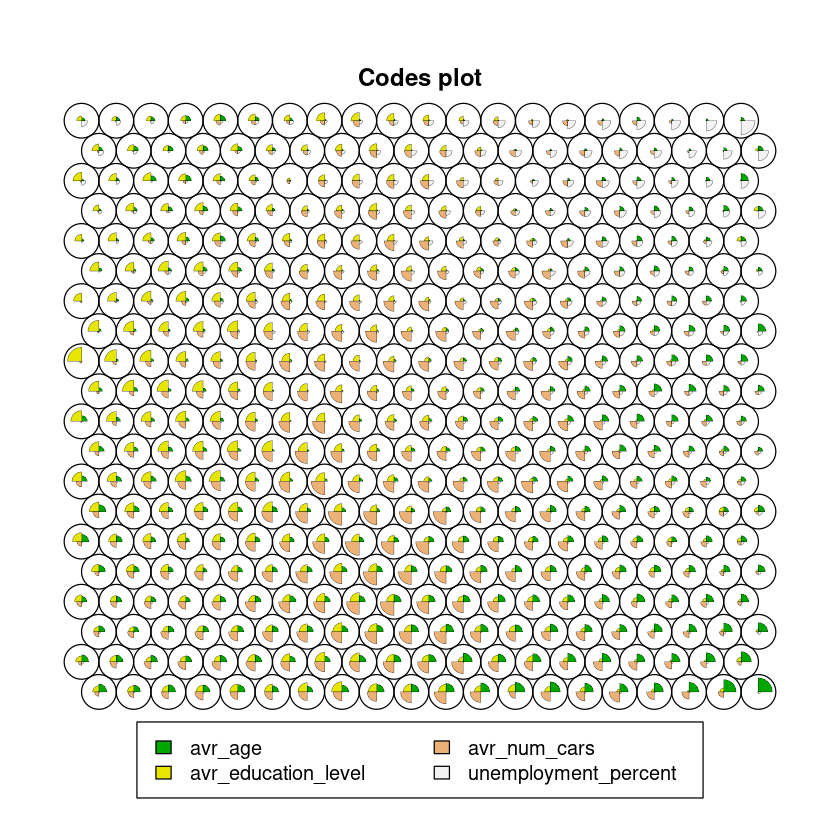

In [32]:
plot(som_model, type = "codes")

## Mapas de calor: _heatmaps_

Los mapas de calor adquieren una especial relevancia en los SOM. El enfoque anterior de presentar los mapas de códigos para cada nodo se vuelve inviable para datos en alta dimensión.

Un mapa de calor permite visualizar la distribución de una variable sobre el mapa.

__Recordatorio:__ los datos de entrada están _fijados_ a su nodo correspondiente, no se mueven. Lo que visualizamos es la distribución de cada uno de sus atributos en el mapa.

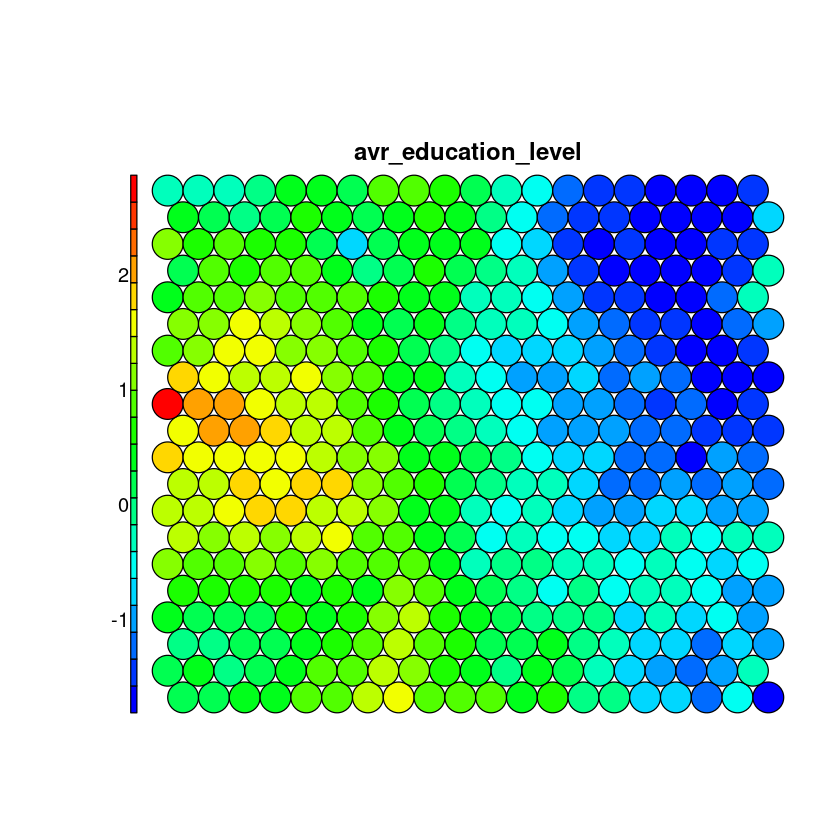

In [58]:
var <- 2
plot(som_model, 
     type = "property", 
     property = getCodes(som_model)[,var], 
     main=colnames(getCodes(som_model))[var], 
     palette.name=coolBlueHotRed
)

La visualización anterior es de la versión normalizada de la variable de interés. Podemos desnormalizarla.

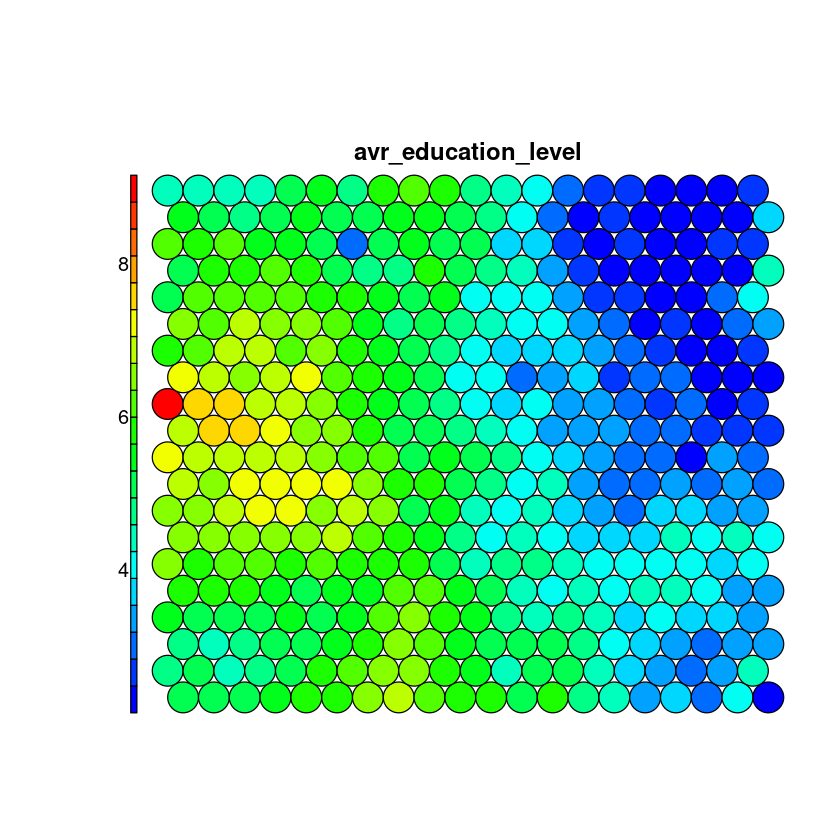

In [60]:
var <- 2 
var_unscaled <- aggregate(as.numeric(data_train[,var]), by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled)

Podemos hacer varios mapas de calor y acumularlos para compararlos visualmente

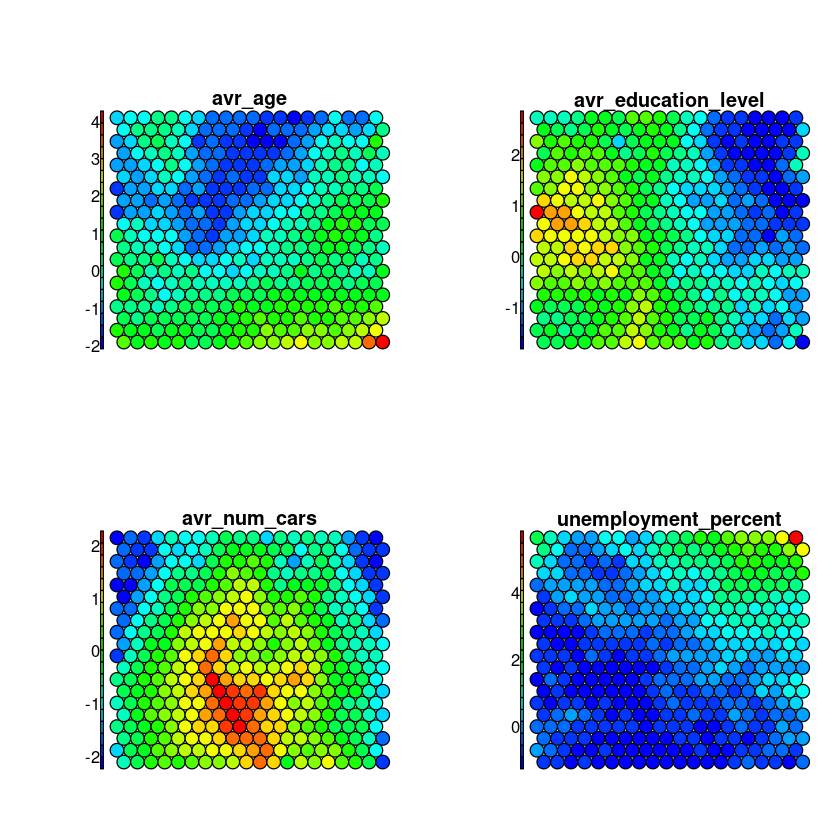

In [68]:
par(mfrow=c(2,2))
for(var in c(1,2,3,4)){
plot(som_model, 
     type = "property", 
     property = getCodes(som_model)[,var], 
     main=colnames(getCodes(som_model))[var], 
     palette.name=coolBlueHotRed
)       
}

## _Clustering_ de los resultados


Podemos realizar un algoritmo de _clustering_ sobre el conjunto de los vectores _prototipo_ de los nodos.

Realizamos una gráfica para averiguar el número de _clusters_ a través de sucesivas aplicaciones de $k-means$ usando la métrica dada por el _WCSS_

Después realizamos un _hierarchical clustering_ `hclust` con el número óptimo que nos indica la gráfica.

Añadimos finalmente la información de los _clusters_ al mapa SOM.

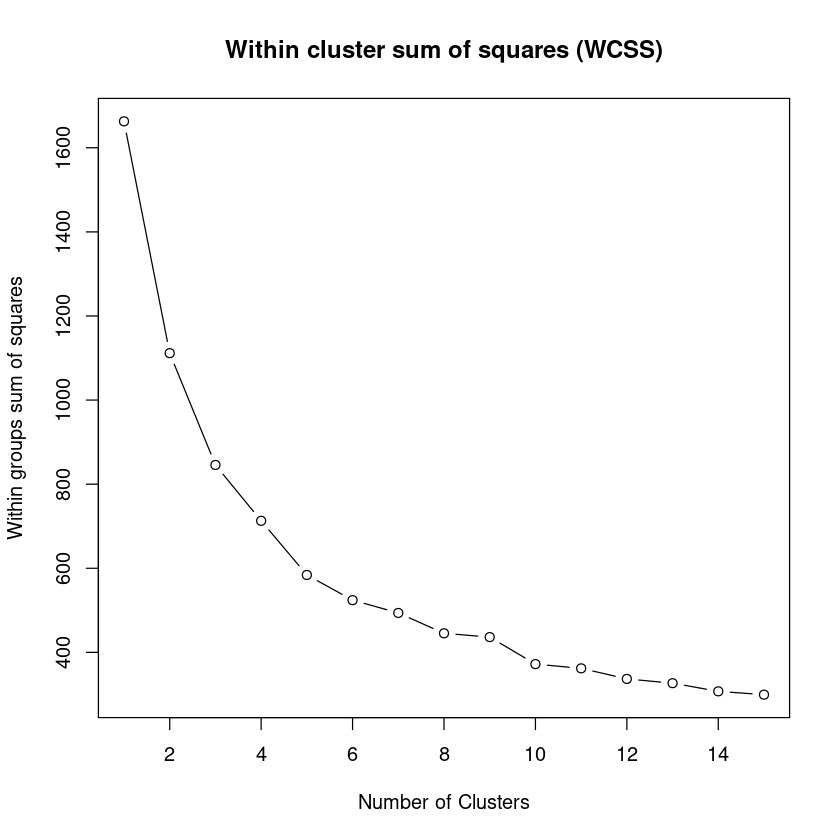

In [37]:
mydata <- getCodes(som_model)
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(mydata,
                                     centers=i)$withinss)
par(mar=c(5.1,4.1,4.1,2.1))
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares", main="Within cluster sum of squares (WCSS)")

In [45]:
som_cluster <- cutree(hclust(dist(getCodes(som_model))), 6)

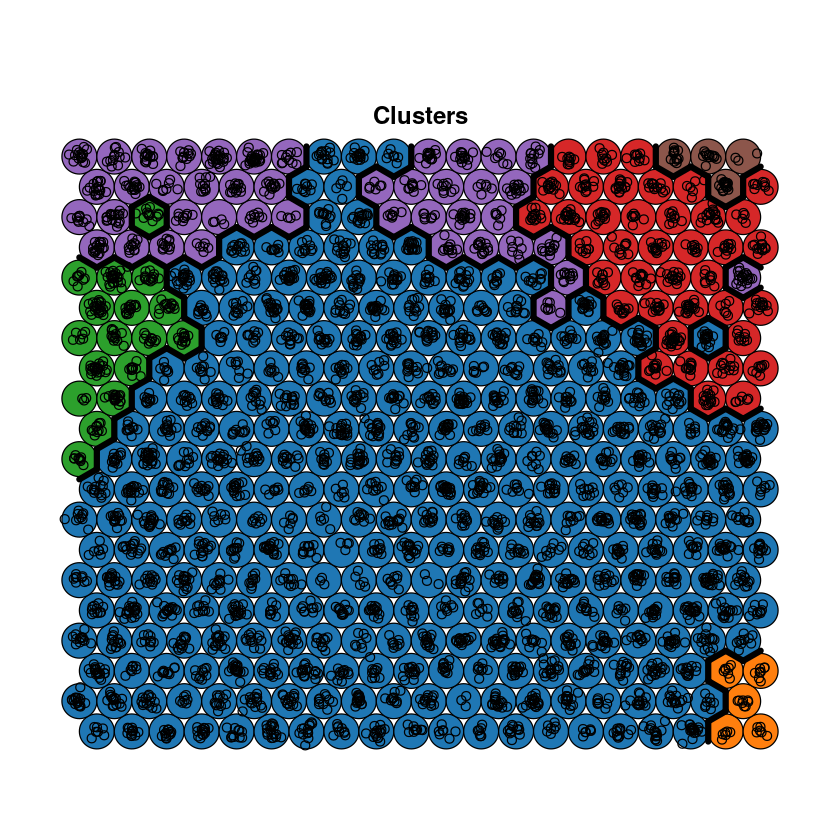

In [49]:
plot(som_model, type="mapping", bgcol = pretty_palette[som_cluster], main = "Clusters")
add.cluster.boundaries(som_model, som_cluster)

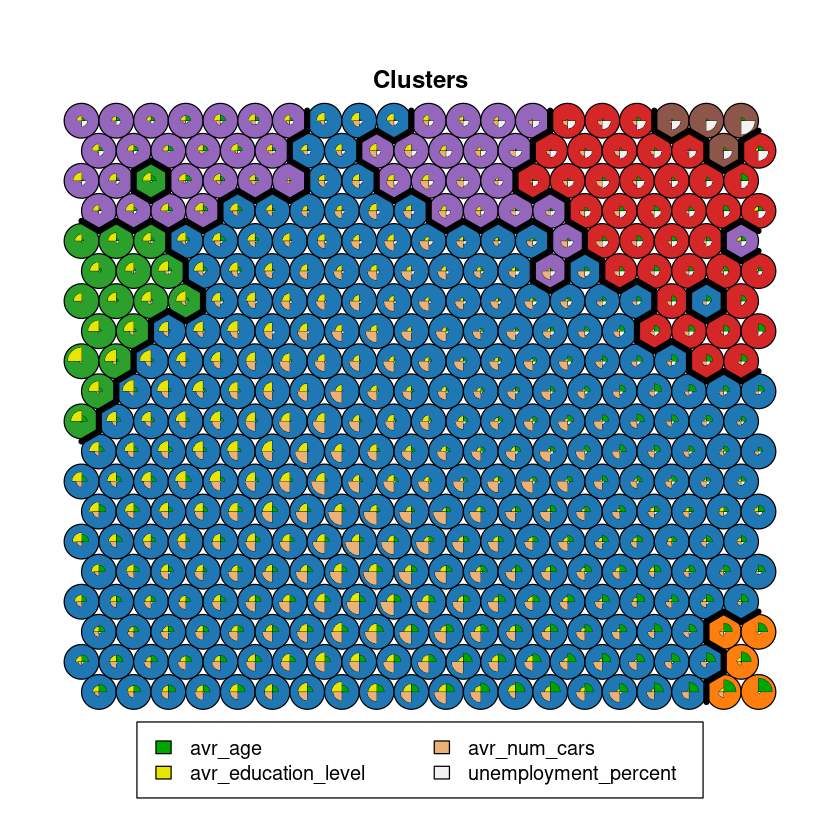

In [51]:
plot(som_model, type="codes", bgcol = pretty_palette[som_cluster], main = "Clusters")
add.cluster.boundaries(som_model, som_cluster)

## Clústeres sobre el mapa topográfico

Si los datos contienen información GIS, es posible representar qué puntos del mapa topográfico de Dublín están relacionados con qué clústeres.

:::{figure-md} markdown-fig.6.05.1
<img src="./images/SOM_Rplot_Ireland.png" alt="fishy" class="bg-primary mb-1" width="600px">

Geolocalización de los clústeres hallados
:::